In [2]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    final_number: int

In [12]:
def addition(state: AgentState) -> AgentState:
    """This function add two numbers"""
    state['final_number'] = state['number1'] + state['number2']
    return state

def subtraction(state: AgentState) -> AgentState:
    """This function subtract two numbers"""
    state['final_number'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This function decide next node based on operation"""
    if state['operation'] == '+':
        return "addition_operation"
    elif state['operation'] == '-':
        return "subtraction_operation"
    else:
        return "invalid_operation"

In [13]:
graph = StateGraph(AgentState)

graph.add_node("add_node", addition)
graph.add_node("subtract_node", subtraction)
graph.add_node('router', lambda state:state) #passthrough function -> no change in state

graph.add_edge(START, "router")

graph.add_conditional_edges(
        source="router",
        path=decide_next_node,
        path_map={
            # Edge: Node
            "addition_operation": "add_node",
            "subtraction_operation": "subtract_node",
            "invalid_operation": END
        }
    )


graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

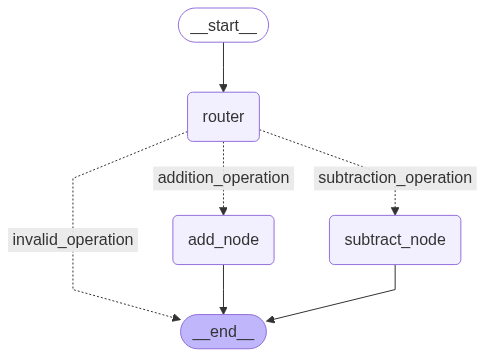

In [14]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
intial_state_1 = AgentState(number1=1, number2=2, operation="+")
result = app.invoke(intial_state_1)

In [16]:
result

{'number1': 1, 'number2': 2, 'operation': '+', 'final_number': 3}